## Objectives:

### Task I.
The Chinook record store has just signed a deal with a new record label and the task is to select the first three albums that will be added to the store from a list of four:

Artist Name, Genre
Regal, Hip-Hop
Red Tone, Punk
Meteor and the Girls, Pop
Slim Jim Bites, Blues

The record label specializes in artists from the USA and they have given Chinook some money to advertise the new albums in the USA, so we are interested in finding out which genres sell the best in the USA.

We will need to find out which genres sell the most tracks in the USA and then create a visualization of that data using pandas.


### Task II.
Here we will take a look at employees' sales performance.


### Task III.
The next task is to analyse the sales data for customers from each different country:
- create a series of visualizations
- make recommendations on which countries may have potential for growth so the Chinook marketing team can create some new advertising campaigns.

In this analysis we will use the country value from the customers table.

In [36]:
#importing libraries

import pandas as pd
import numpy as np

import sqlite3

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [37]:
#functions

def run_query(q):
    with sqlite3.connect(db) as conn:
        return pd.read_sql(q, conn)

def run_command(c):
    with sqlite3.connect(db) as conn:
        conn.isolation_level = None
        conn.execute(c)
        
def show_tables():
    q = '''select name, type from sqlite_master where type in ("table","view");'''
    return run_query(q)

In [38]:
db = "chinook.db"

show_tables()

,name,type
0,album,table
1,artist,table
2,customer,table
3,employee,table
4,genre,table
5,invoice,table
6,invoice_line,table
7,media_type,table
8,playlist,table
9,playlist_track,table


## Task I. Finding out top selling genres in the USA and which albums we should purchase.

In [39]:
albums_to_purchase = '''
WITH usa_tracks_sold AS
   (
    SELECT il.* FROM invoice_line as il
    INNER JOIN invoice as i on il.invoice_id = i.invoice_id
    INNER JOIN customer as c on i.customer_id = c.customer_id
    WHERE c.country = "USA"
   )

SELECT
    g.name as genre,
    COUNT(uts.invoice_line_id) as tracks_sold,
    CAST(COUNT(uts.invoice_line_id) AS FLOAT) / (
        SELECT COUNT(*) from usa_tracks_sold
    ) as percentage_sold
FROM usa_tracks_sold as uts
INNER JOIN track as t on t.track_id = uts.track_id
INNER JOIN genre as g on g.genre_id = t.genre_id
GROUP BY genre
ORDER BY tracks_sold DESC
LIMIT 10;
'''

run_query(albums_to_purchase)

,genre,tracks_sold,percentage_sold
0,Rock,561,0.533777
1,Alternative & Punk,130,0.123692
2,Metal,124,0.117983
3,R&B/Soul,53,0.050428
4,Blues,36,0.034253
5,Alternative,35,0.033302
6,Latin,22,0.020932
7,Pop,22,0.020932
8,Hip Hop/Rap,20,0.019029
9,Jazz,14,0.013321


### Displaying top selling genres in the USA in the chart

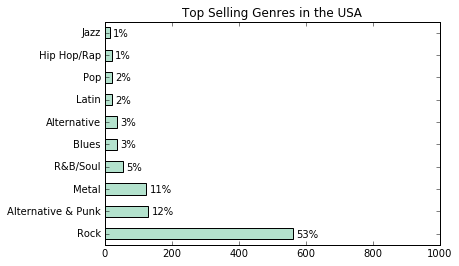

In [40]:

genre_sales_usa = run_query(albums_to_purchase)
genre_sales_usa.set_index("genre", inplace=True, drop=True)

genre_sales_usa["tracks_sold"].plot.barh(
    title="Top Selling Genres in the USA",
    xlim=(0, 1000),
    colormap=plt.cm.Pastel2
)

plt.ylabel('')

for i, label in enumerate(list(genre_sales_usa.index)):
    score = genre_sales_usa.loc[label, "tracks_sold"]
    label = (genre_sales_usa.loc[label, "percentage_sold"] * 100
            ).astype(int).astype(str) + "%"
    plt.annotate(str(label), (score + 10, i - 0.15))

plt.show()

Looking at the above table, we should purchase the following new albums:
- Red Tone (Punk)
- Slim Jim Bites (Blues)
- Meteor and the Girls (Pop)

All of these genres combined will only make up 17% of total sales. The best would be to look for artists and albums from the rock genre which accounts for 53% of sales.

## Task II. Analyzing employees' sales performance

In [41]:
employee_sales_performance = '''
WITH customer_support_rep_sales AS
    (
     SELECT
         i.customer_id,
         c.support_rep_id,
         SUM(i.total) total
     FROM invoice as i
     INNER JOIN customer as c ON i.customer_id = c.customer_id
     GROUP BY i.customer_id, c.support_rep_id
    )

SELECT
    e.first_name || " " || e.last_name as employee,
    e.hire_date,
    SUM(csrs.total) as total_sales
FROM customer_support_rep_sales as csrs
INNER JOIN employee e ON e.employee_id = csrs.support_rep_id
GROUP BY employee;
'''

run_query(employee_sales_performance)

,employee,hire_date,total_sales
0,Jane Peacock,2017-04-01 00:00:00,1731.51
1,Margaret Park,2017-05-03 00:00:00,1584.00
2,Steve Johnson,2017-10-17 00:00:00,1393.92


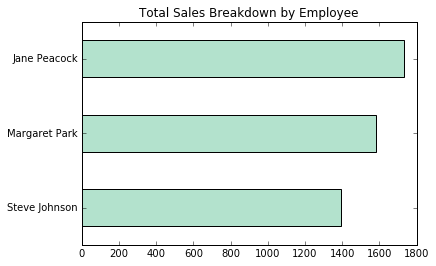

In [42]:
employee_sales = run_query(employee_sales_performance)

employee_sales.set_index("employee", drop=True, inplace=True)
employee_sales.sort_values("total_sales", inplace=True)
employee_sales.plot.barh(
    legend=False,
    title='Total Sales Breakdown by Employee',
    colormap=plt.cm.Pastel2
)
plt.ylabel('')
plt.show()

Jane Peacock is the employee with the highest generated sales - he has 20% more sales than Steve Johnson. But we need to remember that this difference mainly correspons with the difference in their hiring date.

## TASK III. Analyzing Sales by Country

In [43]:
qqq = '''SELECT customer_id, country FROM customer ORDER BY country DESC'''
run_query(qqq)

,customer_id,country
0,52,United Kingdom
1,53,United Kingdom
2,54,United Kingdom
3,16,USA
4,17,USA
5,18,USA
6,19,USA
7,20,USA
8,21,USA
9,22,USA


As we can see above there are plenty of countries where there is only one customer. In order to increase the visibility of our next charts we will put them into "Other" group.

In [44]:
sales_by_country = '''
WITH country_or_other AS
    (
     SELECT
       CASE
           WHEN (
                 SELECT count(*)
                 FROM customer
                 where country = c.country
                ) = 1 THEN "Other"
           ELSE c.country
       END AS country,
       c.customer_id,
       il.*
     FROM invoice_line as il
     INNER JOIN invoice i ON i.invoice_id = il.invoice_id
     INNER JOIN customer c ON c.customer_id = i.customer_id
    )

SELECT
    country,
    customers,
    total_sales,
    average_order,
    customer_lifetime_value
FROM
    (
    SELECT
        country,
        count(distinct customer_id) as customers,
        SUM(unit_price) as total_sales,
        SUM(unit_price) / count(distinct customer_id) as customer_lifetime_value,
        SUM(unit_price) / count(distinct invoice_id) as average_order,
        CASE
            WHEN country = "Other" THEN 1
            ELSE 0
        END AS sort
    FROM country_or_other
    GROUP BY country
    ORDER BY sort ASC, total_sales DESC
    );
'''

run_query(sales_by_country)

,country,customers,total_sales,average_order,customer_lifetime_value
0,USA,13,1040.49,7.942672,80.037692
1,Canada,8,535.59,7.047237,66.948750
2,Brazil,5,427.68,7.011148,85.536000
3,France,5,389.07,7.781400,77.814000
4,Germany,4,334.62,8.161463,83.655000
5,Czech Republic,2,273.24,9.108000,136.620000
6,United Kingdom,3,245.52,8.768571,81.840000
7,Portugal,2,185.13,6.383793,92.565000
8,India,2,183.15,8.721429,91.575000
9,Other,15,1094.94,7.448571,72.996000


### Creating visualisations and finding out which countries to enter with new marketing campaings.

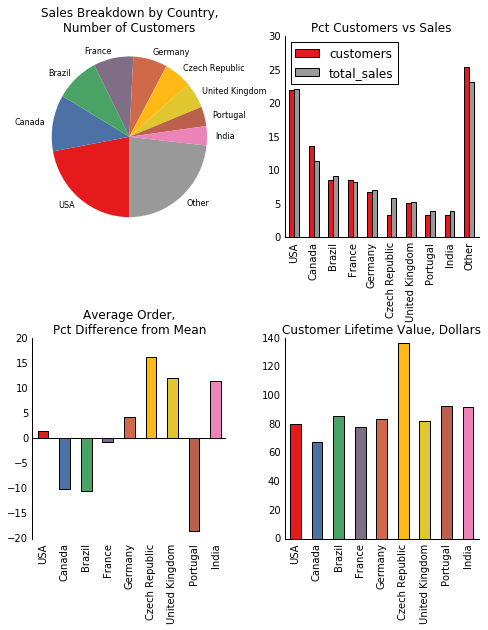

In [48]:
country_metrics = run_query(sales_by_country)
country_metrics.set_index("country", drop=True, inplace=True)
colors = [plt.cm.Set1(i) for i in np.linspace(0, 1, country_metrics.shape[0])]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 9))
ax1, ax2, ax3, ax4 = axes.flatten()
fig.subplots_adjust(hspace=.5, wspace=.3)


# top left
sales_breakdown = country_metrics["total_sales"].copy().rename('')
sales_breakdown.plot.pie(
    ax=ax1,
    startangle=-90,
    counterclock=False,
    title='Sales Breakdown by Country,\nNumber of Customers',
    colormap=plt.cm.Set1,
    fontsize=8,
    wedgeprops={'linewidth':0}
    
)


# top right
cvd_cols = ["customers","total_sales"]
custs_vs_dollars = country_metrics[cvd_cols].copy()
custs_vs_dollars.index.name = ''
for c in cvd_cols:
    custs_vs_dollars[c] /= custs_vs_dollars[c].sum() / 100
custs_vs_dollars.plot.bar(
    ax=ax2,
    colormap=plt.cm.Set1,
    title="Pct Customers vs Sales"
)
ax2.tick_params(top="off", right="off", left="off", bottom="off")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)


# bottom left
avg_order = country_metrics["average_order"].copy()
avg_order.index.name = ''
difference_from_avg = avg_order * 100 / avg_order.mean() - 100
difference_from_avg.drop("Other", inplace=True)
difference_from_avg.plot.bar(
    ax=ax3,
    color=colors,
    title="Average Order,\nPct Difference from Mean"
)
ax3.tick_params(top="off", right="off", left="off", bottom="off")
ax3.axhline(0, color='k')
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.spines["bottom"].set_visible(False)


# bottom right
ltv = country_metrics["customer_lifetime_value"].copy()
ltv.index.name = ''
ltv.drop("Other",inplace=True)
ltv.plot.bar(
    ax=ax4,
    color=colors,
    title="Customer Lifetime Value, Dollars"
)
ax4.tick_params(top="off", right="off", left="off", bottom="off")
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)



plt.show()

Looking at above graphs there might be opportunities in the following countries:
- Czech Republic
- United Kingdom
- India

We need to remember that the amount of data from eacho of these countries is pretty low. That's why, we should be careful with launching big and expensive marketing campaigns. The best apporach would be to run smaller ones and then collecting and analysing new customers to make sure that these trends hold with new customers.